In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from numba import njit
from numba import prange
import pandas as pd
from scipy.stats import mode
from time import time

%matplotlib inline

Popularne instancje QAP wraz z dokładnym minimum funkcji celu Nug12 12 578 (OPT) (12,7,9,3,4,8,11,1,5,6,10,2) Nug14 14 1014 (OPT) (9,8,13,2,1,11,7,14,3,4,12,5,6,10) Nug15 15 1150 (OPT) (1,2,13,8,9,4,3,14,7,11,10,15,6,5,12) Nug16a 16 1610 (OPT) (9,14,2,15,16,3,10,12,8,11,6,5,7,1,4,13) Nug16b 16 1240 (OPT) (16,12,13,8,4,2,9,11,15,10,7,3,14,6,1,5) Nug17 17 1732 (OPT) (16,15,2,14,9,11,8,12,10,3,4,1,7,6,13,17,5) Nug18 18 1930 (OPT) (10,3,14,2,18,6,7,12,15,4,5,1,11,8,17,13,9,16) Nug20 20 2570 (OPT) (18,14,10,3,9,4,2,12,11,16,19,15,20,8,13,17,5,7,1,6) Nug21 21 2438 (OPT) (4,21,3,9,13,2,5,14,18,11,16,10,6,15,20,19,8,7,1,12,17) Nug22 22 3596 (OPT) (2,21,9,10,7,3,1,19,8,20,17,5,13,6,12,16,11,22,18,14,15) Nug24 24 3488 (OPT) (17,8,11,23,4,20,15,19,22,18,3,14,1,10,7,9,16,21,24,12,6,13,5,2) Nug25 25 3744 (OPT) (5,11,20,15,22,2,25,8,9,1,18,16,3,6,19,24,21,14,7,10,17,12,4,23,13) * Nug27 27 5234 (OPT) (23,18,3,1,27,17,5,12,7,15,4,26,8,19,20,2,24,21,14,10,9,13,22,25,6,16,11) * Nug28 28 5166 (OPT) (18,21,9,1,28,20,11,3,13,12,10,19,14,22,15,2,25,16,4,23,7,17,24,26,5,27,8,6) * Nug30 30 6124 (OPT) (5 12 6 13 2 21 26 24 10 9 29 28 17 1 8 7 19 25 23 22 11 16 30 4 15 18 27 3 14 20)

In [2]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug21.dat'

In [3]:
qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])
print('Problem size: %d' % n)

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))
print('Flow matrix:\n', A)

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))
print('Distance matrix:\n', B)

Problem size: 21
Flow matrix:
 [[0. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 7. 2. 3. 4. 5. 6. 7. 8.]
 [1. 0. 1. 2. 3. 4. 5. 2. 1. 2. 3. 4. 5. 6. 3. 2. 3. 4. 5. 6. 7.]
 [2. 1. 0. 1. 2. 3. 4. 3. 2. 1. 2. 3. 4. 5. 4. 3. 2. 3. 4. 5. 6.]
 [3. 2. 1. 0. 1. 2. 3. 4. 3. 2. 1. 2. 3. 4. 5. 4. 3. 2. 3. 4. 5.]
 [4. 3. 2. 1. 0. 1. 2. 5. 4. 3. 2. 1. 2. 3. 6. 5. 4. 3. 2. 3. 4.]
 [5. 4. 3. 2. 1. 0. 1. 6. 5. 4. 3. 2. 1. 2. 7. 6. 5. 4. 3. 2. 3.]
 [6. 5. 4. 3. 2. 1. 0. 7. 6. 5. 4. 3. 2. 1. 8. 7. 6. 5. 4. 3. 2.]
 [1. 2. 3. 4. 5. 6. 7. 0. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 7.]
 [2. 1. 2. 3. 4. 5. 6. 1. 0. 1. 2. 3. 4. 5. 2. 1. 2. 3. 4. 5. 6.]
 [3. 2. 1. 2. 3. 4. 5. 2. 1. 0. 1. 2. 3. 4. 3. 2. 1. 2. 3. 4. 5.]
 [4. 3. 2. 1. 2. 3. 4. 3. 2. 1. 0. 1. 2. 3. 4. 3. 2. 1. 2. 3. 4.]
 [5. 4. 3. 2. 1. 2. 3. 4. 3. 2. 1. 0. 1. 2. 5. 4. 3. 2. 1. 2. 3.]
 [6. 5. 4. 3. 2. 1. 2. 5. 4. 3. 2. 1. 0. 1. 6. 5. 4. 3. 2. 1. 2.]
 [7. 6. 5. 4. 3. 2. 1. 6. 5. 4. 3. 2. 1. 0. 7. 6. 5. 4. 3. 2. 1.]
 [2. 3. 4. 5. 6. 7. 8. 1. 2. 3. 4. 5. 6. 7. 0

# Task 1

In [4]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

@njit
def qap_objective_function2(p):
    s = 0.0
    for i in range(n):
        for j in range(n):
            s += A[i,j] * B[p[i],p[j]]
    return s

In [5]:
@njit
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [11]:
@njit
def kendalltau(p,q,n):
    res = 0
    for i in range(n):
        for j in range(n):
            indexes = np.zeros(4)
            for k in range(n):
                if p[k] == i:
                    indexes[0] = k
                if p[k] == j:
                    indexes[1] = k
                if q[k] == i:
                    indexes[2] = k
                if q[k] == j:
                    indexes[3] = k
            if indexes[0] < indexes[1] and indexes[2] > indexes[3]:
                res += 1
    return res

@njit
def simulated_annealing(T,radius,alpha):
    p = np.random.permutation(n)
    p_cost = qap_objective_function2(p)
    costs = np.zeros(T)
    succ = np.zeros((T,2))
    dist = np.zeros((T,2))
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function2(q)
        succ[t][0] = succ[max(t-1,0)][0]
        succ[t][1] = succ[max(t-1,0)][1]
        if(q_cost < p_cost):
            dist[t][0] = p_cost - q_cost
            dist[t][1] = kendalltau(p,q,n)
            p, p_cost = q, q_cost
            succ[t][0] = succ[max(t-1,0)][0] + 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            succ[t][1] = succ[max(t-1,0)][1] + 1
        costs[t] = p_cost
    return costs,succ,dist

T = 500000
radius = 1
alpha = 0.7
t0 = time()
costs,succ,dist = simulated_annealing(T,radius,alpha)

print(time() - t0, costs.min())

1.7693917751312256 2438.0


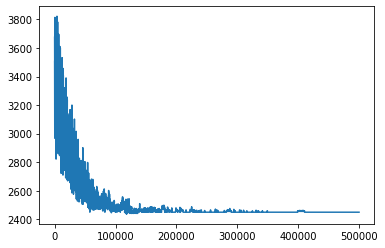

In [12]:
plt.figure()
plt.plot(costs)
plt.show()

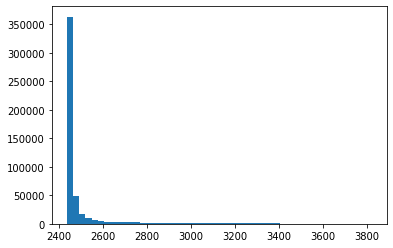

In [13]:
plt.figure()
plt.hist(costs,bins=50)
plt.show()

Lowering alfa increase jumps number, increasing alfa lowers chances for jump
If we increase radius then we are checking bigger suroundings so we lower chances for jump
But from other side bigger radius makes our search in neighbours worse in terms of quality

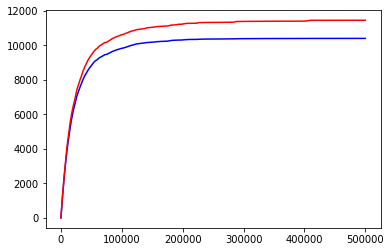

Blue = Success
Red = Failure


In [14]:
plt.figure()
plt.plot(np.arange(T),succ[:,0],color = 'b')
plt.plot(np.arange(T),succ[:,1],color = 'r')
plt.show()
print("Blue = Success\nRed = Failure")

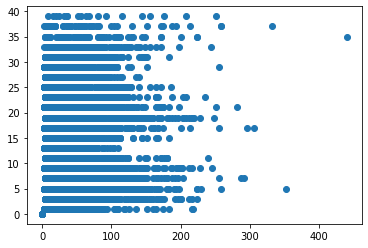

In [15]:
plt.figure()
plt.scatter(dist[:,0],dist[:,1])
plt.show()

My proposed change to acceptance algorithm is that we keep temperature fixed for whole algorithm but we run a lot of different temperaturs parallel.

In [12]:
@njit
def simulated_annealing_beta(T,radius,alpha,temp):
    p = np.random.permutation(n)
    p_cost = qap_objective_function2(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function2(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * temp)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    return costs

@njit(parallel = True)
def beta(T,radius,alpha):
    best = 10000000
    for i in prange(1,101):
        best = min(best,simulated_annealing_beta(T,radius,alpha,(i/100)*T).min())
    return best
        
beta(T,radius,alpha)

2446.0

Jumping only if dist is higher than some limit or if we are later in algorithm

In [17]:
@njit
def distance_alt(p,q):
    res = 0.0
    for i in range(len(p)):
        if p[i] != q[i]:
            for j in range(i,len(q)):
                if p[i] == q[j]:
                    res += np.abs(j-i)
    return res

@njit
def simulated_annealing_theta(T,radius,alpha,mindist):
    p = np.random.permutation(n)
    p_cost = qap_objective_function2(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function2(q)
        dist = distance_alt(p,q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)) and (dist > mindist or t > T/4):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    return costs

T = 500000
radius = 1
alpha = 0.7
t0 = time()
costs2 = simulated_annealing_theta(T,radius,alpha,5)

print(time() - t0, costs2.min())

1.016812801361084 2438.0


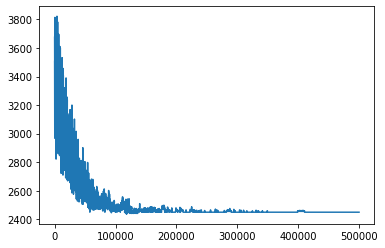

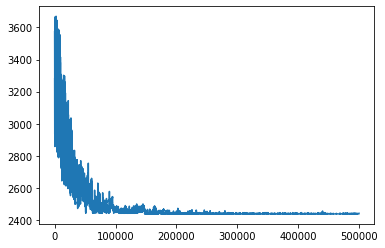

In [18]:
plt.figure()
plt.plot(costs)
plt.show()
plt.figure()
plt.plot(costs2)
plt.show()

# Task 2 - PBIL

In [4]:
@njit
def binary_random(p):
    if np.random.uniform(0.0,1.0) < p:
        return 1
    else:
        return 0

@njit
def random_individual(p,d):
    x = np.zeros(d)
    for i in range(d):
        x[i] = binary_random(p[i])
    return x

@njit
def random_population(p,n,d):
    x = np.zeros((n,d))
    for i in range(n):
        x[i] = random_individual(p,d)
    return x

In [5]:
@njit
def evaluate(population):
    results = np.zeros(population.shape[0])
    for i in range(population.shape[0]):
        results[i] = np.sum(population[i])
        if results[i] == 0:
            results[i] = population.shape[0] + 1
    return results

@njit
def evaluate_k(population,k):
    results = np.zeros(population.shape[0])
    for i in range(population.shape[0]):
        cnt = 0
        for j in range(population.shape[1]):
            cnt += 1
            if population[i][j] == 1:
                results[i] +=1
                cnt = 0
            if cnt == k:
                results[i] += k + 1
                cnt = 0
    return results
@njit
def pbil(n,d,alfa,beta,theta,limit,KD):
    p = np.zeros(d) + 0.5
    population = random_population(p,n,d)
    population_eval = evaluate_k(population,KD)
    hist = np.zeros((limit,d))
    for i in range(limit):
        hist[i] = p
        if i%10000 == 0:
            print(i/limit)
        choosen_one = population[np.argmax(population_eval)]
        for k in range(d):
            p[k] = p[k] * (1 - alfa) + choosen_one[k] * alfa
        for k in range(d):
            if np.random.uniform(0.0,1.0) < beta:
                p[k] = p[k] * (1-theta) + binary_random(0.5) * theta
        population = random_population(p,n,d)
        population_eval = evaluate_k(population,KD)
    return hist

In [21]:
res_seven = pbil(1000,100,0.01,0.05,0.01,100000,5)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


One Max with low mutation rate and high learning rate.

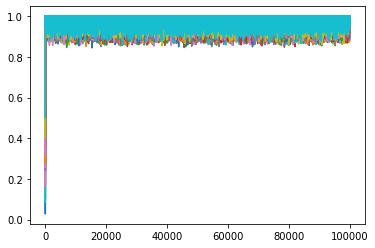

In [42]:
for i in range(100):
    plt.plot(np.arange(100000),res_one[:,i],alpha = 1)

One Max with high mutation rate

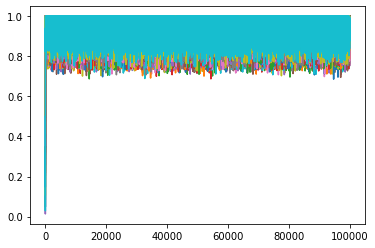

In [44]:
for i in range(100):
    plt.plot(np.arange(100000),res_two[:,i],alpha = 1)

Deceptive One Max with high mutation and low learning rate

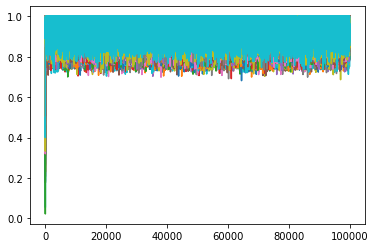

In [77]:
for i in range(100):
    plt.plot(np.arange(100000),res_three[:,i],alpha = 1)

Deceptive One Max with high learning rate

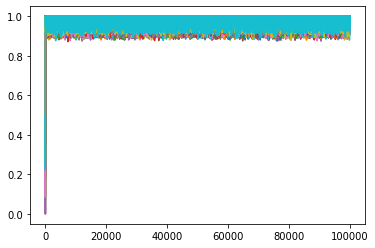

In [75]:
for i in range(100):
    plt.plot(np.arange(100000),res_four[:,i],alpha = 1)

K-Deceptive One Max with k = 5 and high mutation

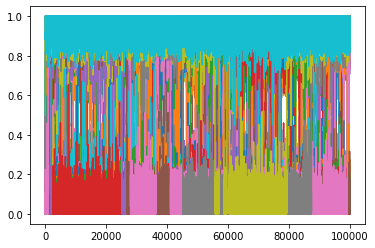

In [36]:
for i in range(100):
    plt.plot(np.arange(100000),res_five[:,i],alpha = 1)

K-Deceptive One Max with k = 5 and low mutation, high learning rate

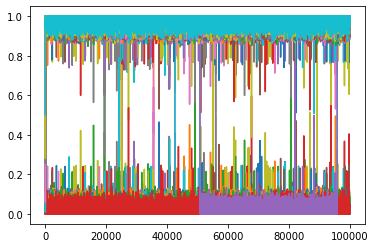

In [38]:
for i in range(100):
    plt.plot(np.arange(100000),res_six[:,i],alpha = 1)

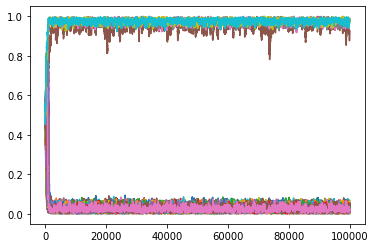

In [22]:
for i in range(100):
    plt.plot(np.arange(100000),res_seven[:,i],alpha = 1)

K-Deceptive One Max with k = 1 and high learning rate

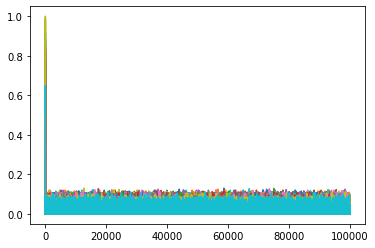

In [33]:
for i in range(100):
    plt.plot(np.arange(100000),res_ten[:,i],alpha = 1)

# Task 3 - PBIL with spectral photos

In [6]:
#well in fact we dont need it
ImageRaw = open("lista01/ImageRawReduced.txt", 'r')
numbers = ImageRaw.read().split()
ImageRaw = np.zeros((9350,3))
for i in range(9350):
    for j in range(3):
        ImageRaw[i][j] = numbers[i*3+j]

In [7]:
ImageExp = open("lista01/ImageExpertReduced.txt", 'r')
numbers = ImageExp.readline().split()
ImageExp = np.zeros(9350)
for i in range(9350):
    ImageExp[i] = numbers[i]

In [8]:
classificator = open("lista01/ClassificationRules.txt")
number = classificator.read().split()
C = np.zeros((266,9350))
for i in range(266):
    for j in range(9350):
        C[i][j] = number[i*9350+j]

In [9]:
@njit
def evaluate_population(population,c,expert):
    scores = np.zeros(population.shape[0])
    for i in range(population.shape[0]):
        votes = np.zeros((9350,3))
        for j in range(population.shape[1]):
            if population[i][j] == 1: #if individual is using this classificator
                for k in range(9350): #then +=1 to votes on this class from classificator
                    votes[k][int(c[j][k])-1] += 1
        for j in range(9350):
            if np.argmax(votes[j,:])+1 == int(expert[j]):
                scores[i] += 1
    return scores/9350

@njit
def pbilIM(n,d,alfa,beta,theta,limit,c,expert):
    p = np.zeros(d) + 0.5
    population = random_population(p,n,d)
    population_eval = evaluate_population(population,c,expert)
    hist = np.zeros((limit,d))
    for i in range(limit):
        hist[i] = p
        if i%100 == 0:
            print(i/limit)
            print(population_eval.max())
        choosen_one = population[np.argmax(population_eval)]
        for k in range(d):
            p[k] = p[k] * (1 - alfa) + choosen_one[k] * alfa
        for k in range(d):
            if np.random.uniform(0.0,1.0) < beta:
                p[k] = p[k] * (1-theta) + binary_random(0.5) * theta
        population = random_population(p,n,d)
        population_eval = evaluate_population(population,c,expert)
    return hist

In [27]:
test = np.zeros(266)+1
evaluate_population(test.reshape(1,266),C,ImageExp)

array([0.8515508])

In [28]:
a = time()
costs = pbilIM(1000,266,0.01,0.05,0.01,1000,C,ImageExp)
print(time()-a)

0.0
0.9535828877005348
0.1
0.9757219251336898
0.2
0.98
0.3
0.981711229946524
0.4
0.9828877005347594
0.5
0.9831016042780749
0.6
0.9835294117647059
0.7
0.9834224598930481
0.8
0.9844919786096257
0.9
0.9847058823529412
1829.2871398925781


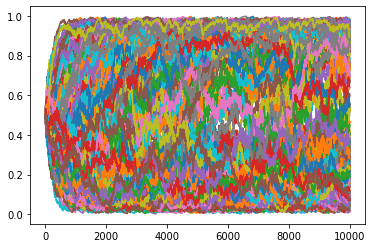

In [11]:
for i in range(266):
    plt.plot(np.arange(10000),costs[:,i],alpha = 1)

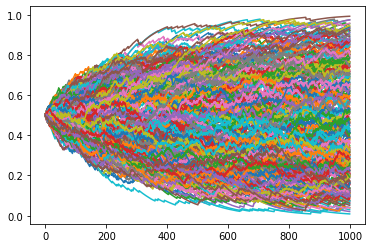

In [30]:
for i in range(266):
    plt.plot(np.arange(1000),costs[:,i],alpha = 1)

# Bonus task

In [10]:
@njit
def evaluate_populationB(population,c,expert):
    scores = np.zeros(population.shape[0])
    for i in range(population.shape[0]):
        votes = np.zeros((9350,3))
        for j in range(population.shape[1]):
            for k in range(9350):
                votes[k][int(c[j][k])-1] += population[i][j]
        for j in range(9350):
            if np.argmax(votes[j,:])+1 == int(expert[j]):
                scores[i] += 1
    return scores/9350

@njit
def random_weight(p):
    return np.random.uniform(p[0],p[1])

@njit
def random_individual(p,d):
    x = np.zeros(d)
    for i in range(d):
        x[i] = random_weight(p[i])
    return x

@njit
def random_population(p,n,d):
    x = np.zeros((n,d))
    for i in range(n):
        x[i] = random_individual(p,d)
    return x

@njit
def pbilB(n,d,alfa,beta,theta,limit,c,expert):
    p = np.zeros((d,2))
    p[:,1] = p[:,1] + 1
    population = random_population(p,n,d)
    population_eval = evaluate_populationB(population,c,expert)
    hist = np.zeros((limit,d,2))
    for i in range(limit):
        hist[i] = p
        if i%100 == 0:
            print(i/limit)
            print(population_eval.max())
        choosen_one = population[np.argmax(population_eval)]
        for k in range(d):
            p[k] = p[k] * (1-alfa) + np.array(choosen_one[k] * alfa)
            #p[k] = p[k] * (1 - alfa) + choosen_one[k] * alfa
        for k in range(d):
            if np.random.uniform(0.0,1.0) < beta:
                p[k] = p[k] * (1-theta) + np.array(random_weight(np.array([0,1])) * theta)
                #p[k] = p[k] * (1-theta) + binary_random(0.5) * theta
        population = random_population(p,n,d)
        population_eval = evaluate_populationB(population,c,expert)
    return hist

In [24]:
a = time()
costS2 = pbilB(200,266,0.01,0.05,0.01,1000,C,ImageExp)
print(time()-a)

0.0
0.9009625668449198
0.1
0.9050267379679144
0.2
0.9029946524064171
0.3
0.9022459893048128
0.4
0.9041711229946524
0.5
0.9039572192513369
0.6
0.9042780748663102
0.7
0.9018181818181819
0.8
0.9002139037433156
0.9
0.9001069518716578
722.9797611236572


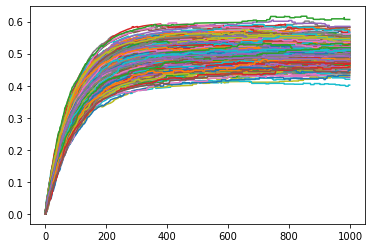

In [21]:
#weak
for i in range(266):
    plt.plot(np.arange(1000),costS[:,i,0],alpha = 1)
plt.show()

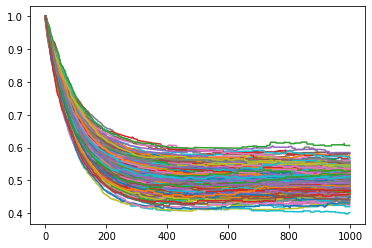

In [22]:
for i in range(266):
    plt.plot(np.arange(1000),costS[:,i,1],alpha = 1)
plt.show()

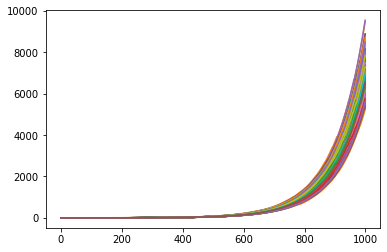

In [25]:
#90%
for i in range(266):
    plt.plot(np.arange(1000),costS2[:,i,0],alpha = 1)
plt.show()

In [43]:
@njit
def pbilBeta(n,d,alfa,beta,theta,limit,c,expert):
    p = np.zeros((d,2))
    p[:,1] = p[:,1] + 1
    population = random_population(p,n,d)
    population_eval = evaluate_populationB(population,c,expert)
    hist = np.zeros((limit,d,2))
    for i in range(limit):
        hist[i] = p
        if i%100 == 0:
            print(i/limit)
            print(population_eval.max())
        choosen_one = population[np.argmax(population_eval)]
        for k in range(d):
            update = (choosen_one[k] - 0.5) * 2 * alfa
            p[k] = p[k] * np.array([1-alfa,1+alfa])
            p[k] = p[k] + np.array([update,update])
            p[k][1] = max(0,min(p[k][1],1))
            p[k][0] = min(1,max(p[k][0],0))
            #p[k] = p[k] * (1 - alfa) + choosen_one[k] * alfa
        for k in range(d):
            if np.random.uniform(0.0,1.0) < beta:
                update = (random_weight(np.array([0,1])) - 0.5) * 2 * theta
                p[k] = p[k] * np.array([1-theta,1+theta])
                p[k] = p[k] + np.array([update,update])
                p[k][1] = max(0,min(p[k][1],1))
                p[k][0] = min(1,max(p[k][0],0))
                #p[k] = p[k] * (1-theta) + binary_random(0.5) * theta
        population = random_population(p,n,d)
        population_eval = evaluate_populationB(population,c,expert)
    return hist

In [69]:
a = time()
costS2 = pbilBeta(200,266,0.01,0.05,0.01,1000,C,ImageExp)
print(time()-a)

0.0
0.901283422459893
0.1
0.9202139037433155
0.2
0.9324064171122994
0.3
0.9322994652406417
0.4
0.9383957219251337
0.5
0.9463101604278075
0.6
0.9477005347593583
0.7
0.9466310160427808
0.8
0.9521925133689839
0.9
0.9616042780748663
692.9724371433258


In [74]:
print(costS2[999])

[[1.89120322e-01 1.00000000e+00]
 [1.14113080e-02 1.00000000e+00]
 [3.96921968e-01 1.00000000e+00]
 [4.38276859e-01 1.00000000e+00]
 [3.41412300e-01 1.00000000e+00]
 [2.43707419e-01 1.00000000e+00]
 [1.11777407e-02 1.00000000e+00]
 [1.95590690e-02 1.00000000e+00]
 [2.36214104e-02 1.00000000e+00]
 [5.40706658e-03 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.06601448e-03 1.00000000e+00]
 [3.97612267e-02 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.83644501e-03 1.00000000e+00]
 [1.37746167e-02 1.00000000e+00]
 [3.72108313e-02 1.00000000e+00]
 [1.02426932e-02 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.03792227e-02 1.00000000e+00]
 [8.53400977e-03 1.00000000e+00]
 [1.75084135e-02 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.80550864e-02 1.00000000e+00]
 [3.81773778e-03 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [9.57387251e-03 1.00000000e+00]
 [3.13630319e-03 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.57119346e-03 1.00000000e+00]
 [1.348477

In [74]:
@njit
def get_spread(p,alfa):
    spread = np.zeros(2)
    if p[0] <= 0:
        spread[0] = 1 + alfa
    elif p[0] > 0:
        spread[0] = 1 - alfa
    if p[1] >= 0:
        spread[1] = 1 + alfa
    else:
        spread[1] = 1 - alfa
    return spread

@njit
def pbilTheta(n,d,alfa,beta,theta,limit,c,expert):
    p = np.zeros((d,2))
    p[:,0] = p[:,0] - 1
    p[:,1] = p[:,1] + 1
    population = random_population(p,n,d)
    population_eval = evaluate_populationB(population,c,expert)
    hist = np.zeros((limit,d,2))
    res = 0
    for i in range(limit):
        hist[i] = p
        res = max(res,population_eval.max())
        if i%100 == 0:
            print(i/limit)
            print(res)
        choosen_one = population[np.argmax(population_eval)]
        for k in range(d):
            update = choosen_one[k] * 3 * alfa
            spread = get_spread(p[k],alfa)
            p[k] = p[k] * spread
            p[k] = p[k] + np.array([update,update])
            p[k][1] = max(-1,min(p[k][1],1))
            p[k][0] = min(1,max(p[k][0],-1))
            #p[k] = p[k] * (1 - alfa) + choosen_one[k] * alfa
        for k in range(d):
            if np.random.uniform(0.0,1.0) < beta:
                update = random_weight(np.array([-1,1])) * 3 * theta
                spread = get_spread(p[k],theta)
                p[k] = p[k] * spread
                p[k] = p[k] + np.array([update,update])
                p[k][1] = max(-1,min(p[k][1],1))
                p[k][0] = min(1,max(p[k][0],-1))
                #p[k] = p[k] * (1-theta) + binary_random(0.5) * theta
        population = random_population(p,n,d)
        population_eval = evaluate_populationB(population,c,expert)
    return hist

In [57]:
a = time()
costS4 = pbilTheta(200,266,0.01,0.05,0.01,1000,C,ImageExp)
print(time()-a)

0.0
0.8216042780748664
0.1
0.907379679144385
0.2
0.9093048128342246
0.3
0.8502673796791443
0.4
0.9041711229946524
0.5
0.9474866310160428
0.6
0.947807486631016
0.7
0.9367914438502674
0.8
0.9272727272727272
0.9
0.9377540106951872
709.2961790561676


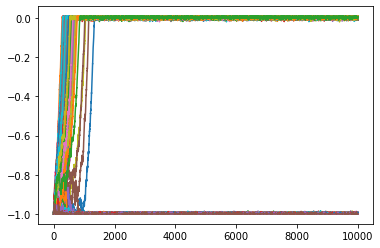

In [71]:
#succ higher than 0.983 for without 2* term in alfa and theta
for i in range(266):
    plt.plot(np.arange(10000),costS3[:,i,0],alpha = 1)
plt.show()

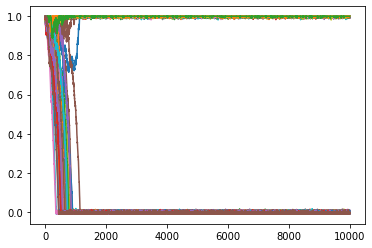

In [72]:
for i in range(266):
    plt.plot(np.arange(10000),costS3[:,i,1],alpha = 1)
plt.show()

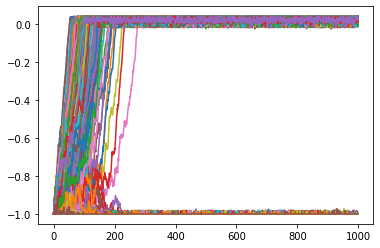

In [91]:
#2* in theta and alfa
for i in range(266):
    plt.plot(np.arange(1000),costS4[:,i,0],alpha = 1)
plt.show()

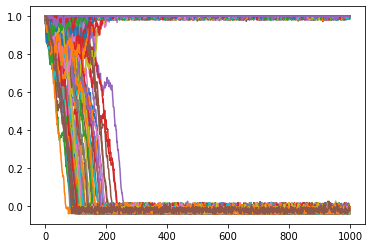

In [92]:
for i in range(266):
    plt.plot(np.arange(1000),costS4[:,i,1],alpha = 1)
plt.show()

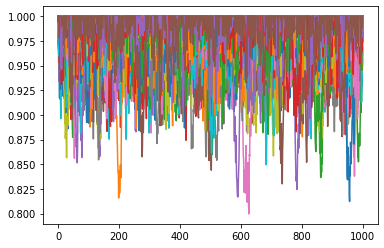

In [58]:
for i in range(266):
    plt.plot(np.arange(1000),costS4[:,i,1],alpha = 1)
plt.show()

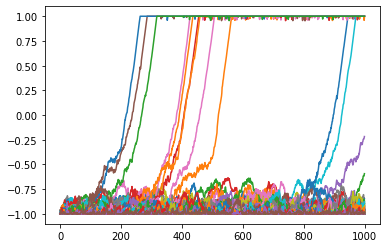

In [59]:
for i in range(266):
    plt.plot(np.arange(1000),costS4[:,i,0],alpha = 1)
plt.show()

In [87]:
@njit
def random_weight(p):
    return np.random.normal(loc = p,scale = 0.2)

@njit
def random_individual(p,d):
    x = np.zeros(d)
    for i in range(d):
        x[i] = random_weight(p[i])
    return x

@njit
def random_population(p,n,d):
    x = np.zeros((n,d))
    for i in range(n):
        x[i] = random_individual(p,d)
    return x

@njit
def pbilNorm(n,d,alfa,beta,theta,limit,c,expert):
    p = np.zeros(d)
    population = random_population(p,n,d)
    population_eval = evaluate_populationB(population,c,expert)
    hist = np.zeros((limit,d))
    res = 0
    for i in range(limit):
        hist[i] = p
        res = max(res,population_eval.max())
        if i%100 == 0:
            print(i/limit)
            print(res)
        choosen_one = population[np.argmax(population_eval)]
        for k in range(d):
            update = choosen_one[k] * 2 * alfa
            p[k] = p[k] * (1-alfa)
            p[k] = p[k] + update
            #p[k] = p[k] * (1 - alfa) + choosen_one[k] * alfa
        for k in range(d):
            if np.random.uniform(0.0,1.0) < beta:
                update = random_weight(0) * 2 * theta
                p[k] = p[k] * (1-theta)
                p[k] = p[k] + update
                #p[k] = p[k] * (1-theta) + binary_random(0.5) * theta
        population = random_population(p,n,d)
        population_eval = evaluate_populationB(population,c,expert)
    print(res)
    return hist

In [88]:
a = time()
costS5 = pbilNorm(200,266,0.01,0.05,0.01,1000,C,ImageExp)
print(time()-a)

0.0
0.8728342245989305
0.1
0.9762566844919786
0.2
0.9836363636363636
0.3
0.9850267379679144
0.4
0.9851336898395722
0.5
0.9852406417112299
0.6
0.9852406417112299
0.7
0.9852406417112299
0.8
0.9852406417112299
0.9
0.9852406417112299
0.9852406417112299
702.5452108383179


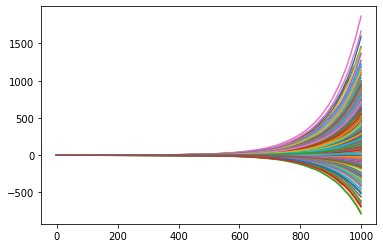

In [89]:
for i in range(266):
    plt.plot(np.arange(1000),costS5[:,i],alpha = 1)
plt.show()